In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Percentile Method of Removing Outliers 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day44-outlier-detection-using-percentiles/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In this method we generally fix a particular percentile for an outlier from both i.e min and max of the data

### Tripping 

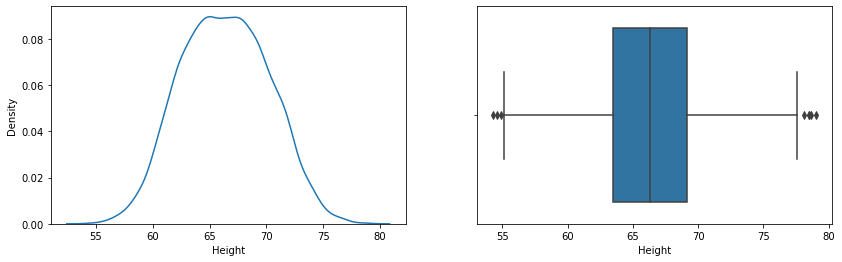

In [4]:
plt.figure(figsize = (14, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['Height'], hist = False)
plt.subplot(1, 2, 2)
sns.boxplot(df['Height'])
plt.show()

In [5]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [6]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df["Height"].quantile(0.01)

In [7]:
upper_limit

74.7857900583366

In [8]:
lower_limit

58.13441158671655

In [9]:
new_df = df.copy()

In [10]:
#for trimming
new_df = df[(df['Height'] <= upper_limit)&(df['Height'] >= lower_limit)]

In [11]:
new_df.describe()

,Height,Weight
count,9800.000000,9800.000000
mean,66.364366,161.399489
std,3.645075,30.933549
min,58.134496,77.523774
25%,63.577162,136.322717
50%,66.318070,161.212928
75%,69.119896,186.753317
max,74.785714,249.946283


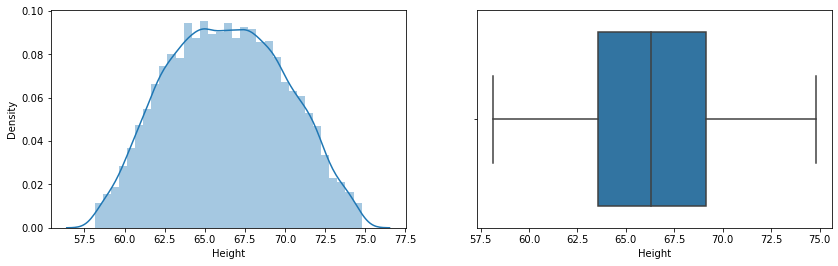

In [12]:
plt.figure(figsize = (14, 4))
plt.subplot(1, 2, 1)
sns.distplot(new_df['Height'])
plt.subplot(1, 2, 2)
sns.boxplot(new_df['Height'])
plt.show()

In [13]:
#thus, trimming is completed here now we proceed with capping

In [14]:
new_df2 = df.copy()

In [16]:
new_df2['Height'] = np.where(df['Height']<= lower_limit, lower_limit, np.where(df['Height'] >= upper_limit, upper_limit, df['Height']))

In [17]:
new_df2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


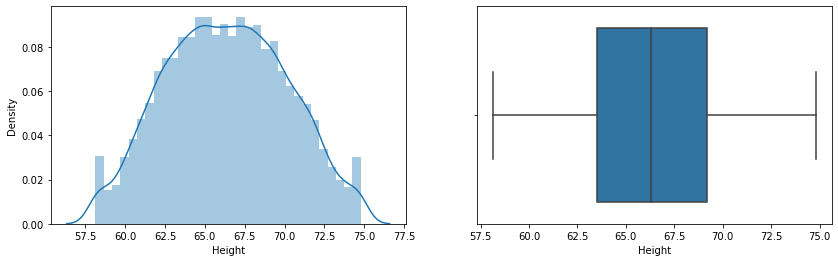

In [21]:
plt.figure(figsize = (14, 4))
plt.subplot(1, 2, 1)
sns.distplot(new_df2['Height'])
plt.subplot(1, 2, 2)
sns.boxplot(new_df2['Height'])
plt.show()

In [19]:
new_df.shape

(9800, 3)

In [20]:
new_df2.shape

(10000, 3)

thus, I think capping is better for handling outliers. while capping we can use upperlimit + 1 and lowerlimit with lowerlimit -1